In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
bs = 64
np.random.seed(1204)

In [29]:
import gc

# Create train and validation dataset

In [4]:
import os
import shutil

In [5]:
train=['castle','beauty','howl','pocahontas']
val = ['tarzan','mononoke']

In [14]:
BOTH_PATH = '/media/quantran/KWOOON/games/animation-classification/data/'
CHAR_PATH = '/media/quantran/KWOOON/animation-character/'

In [15]:
TRAIN_PATH = '/home/quantran/kwon/animation-classification/data_2/train/'
VAL_PATH = '/home/quantran/kwon/animation-classification/data_2/val/'

In [8]:
def get_img_names(fnames):
    return  [str(f).split('/')[-1] for f in fnames]

In [13]:
def copy_imgs(src_path,imgs,dest_path,val_size=0):
    print('Copying files ...')
    idx = np.random.permutation(len(imgs))[:val_size] if val_size else np.arange(len(imgs))
    for i in idx:
        shutil.copy2(src_path+imgs[i],dest_path)
    print('Done!')
        

In [16]:
#val
for tr in val:
    path = Path(BOTH_PATH)/tr
    both_files = set(get_img_names(path.ls()))
    path = Path(CHAR_PATH)/tr
    char_files = set(get_img_names(path.ls()))
    nonchar_files = both_files - char_files
    assert len(both_files) == len(char_files)+len(nonchar_files)
    print(f'{tr}: {len(char_files)} char, {len(nonchar_files)} nonchar')
    
    # copy to char class
    copy_imgs(CHAR_PATH+tr+'/',list(char_files),VAL_PATH+'char/')
    # copy to nonchar class
    copy_imgs(BOTH_PATH+tr+'/',list(nonchar_files),VAL_PATH+'nonchar/')

tarzan: 1329 char, 1861 nonchar
Copying files ...
Done!
Copying files ...
Done!
mononoke: 1914 char, 2765 nonchar
Copying files ...
Done!
Copying files ...
Done!


In [17]:
#train
for tr in train:
    path = Path(BOTH_PATH)/tr
    both_files = set(get_img_names(path.ls()))
    path = Path(CHAR_PATH)/tr
    char_files = set(get_img_names(path.ls()))
    nonchar_files = both_files - char_files
    assert len(both_files) == len(char_files)+len(nonchar_files)
    print(f'{tr}: {len(char_files)} char, {len(nonchar_files)} nonchar')
    
    # copy to char class
    copy_imgs(CHAR_PATH+tr+'/',list(char_files),TRAIN_PATH+'char/')
    # copy to nonchar class
    copy_imgs(BOTH_PATH+tr+'/',list(nonchar_files),TRAIN_PATH+'nonchar/')

castle: 1772 char, 1729 nonchar
Copying files ...
Done!
Copying files ...
Done!
beauty: 1963 char, 1334 nonchar
Copying files ...
Done!
Copying files ...
Done!
howl: 2211 char, 2011 nonchar
Copying files ...
Done!
Copying files ...
Done!
pocahontas: 1716 char, 1200 nonchar
Copying files ...
Done!
Copying files ...
Done!


# Let's just try

In [ ]:
bs = 128

In [ ]:
PATH = Path('data_2')

tfms = get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0,p_affine=0,p_lighting=0)

data = ImageDataBunch.from_folder(PATH,valid='val',bs=bs,ds_tfms = tfms,size=224,num_workers=4).normalize(imagenet_stats)

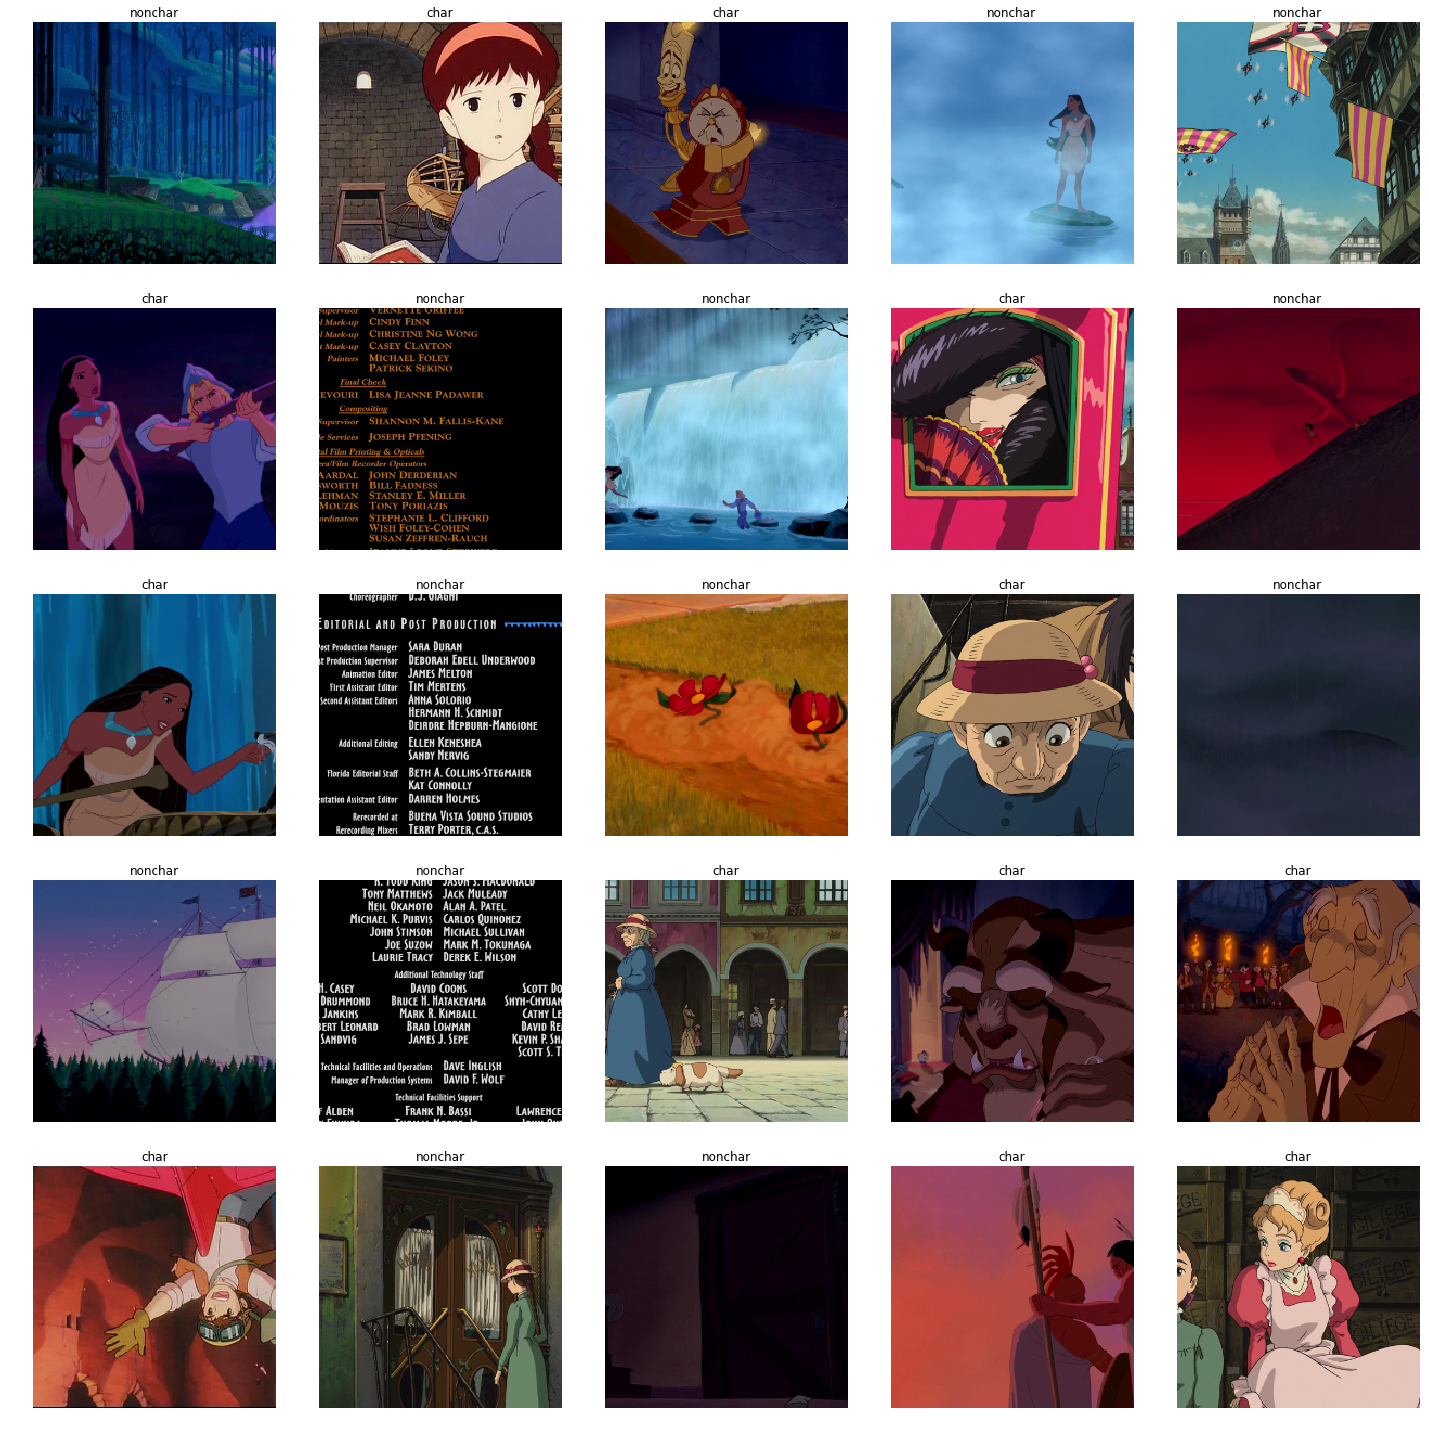

In [32]:
data.show_batch(rows=5)

In [30]:
learn=None
gc.collect()

140

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=accuracy).to_fp16()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


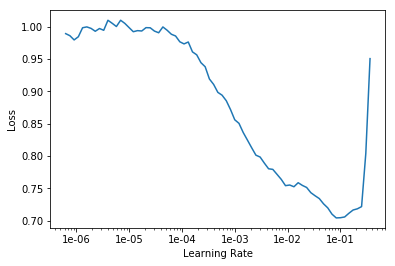

In [20]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [21]:
learn.freeze()
learn.fit_one_cycle(3,max_lr=1e-02)

# Interpretation

In [23]:
learn.data.valid_dl.add_tfm(to_half)

In [24]:
interp = ClassificationInterpretation.from_learner(learn)

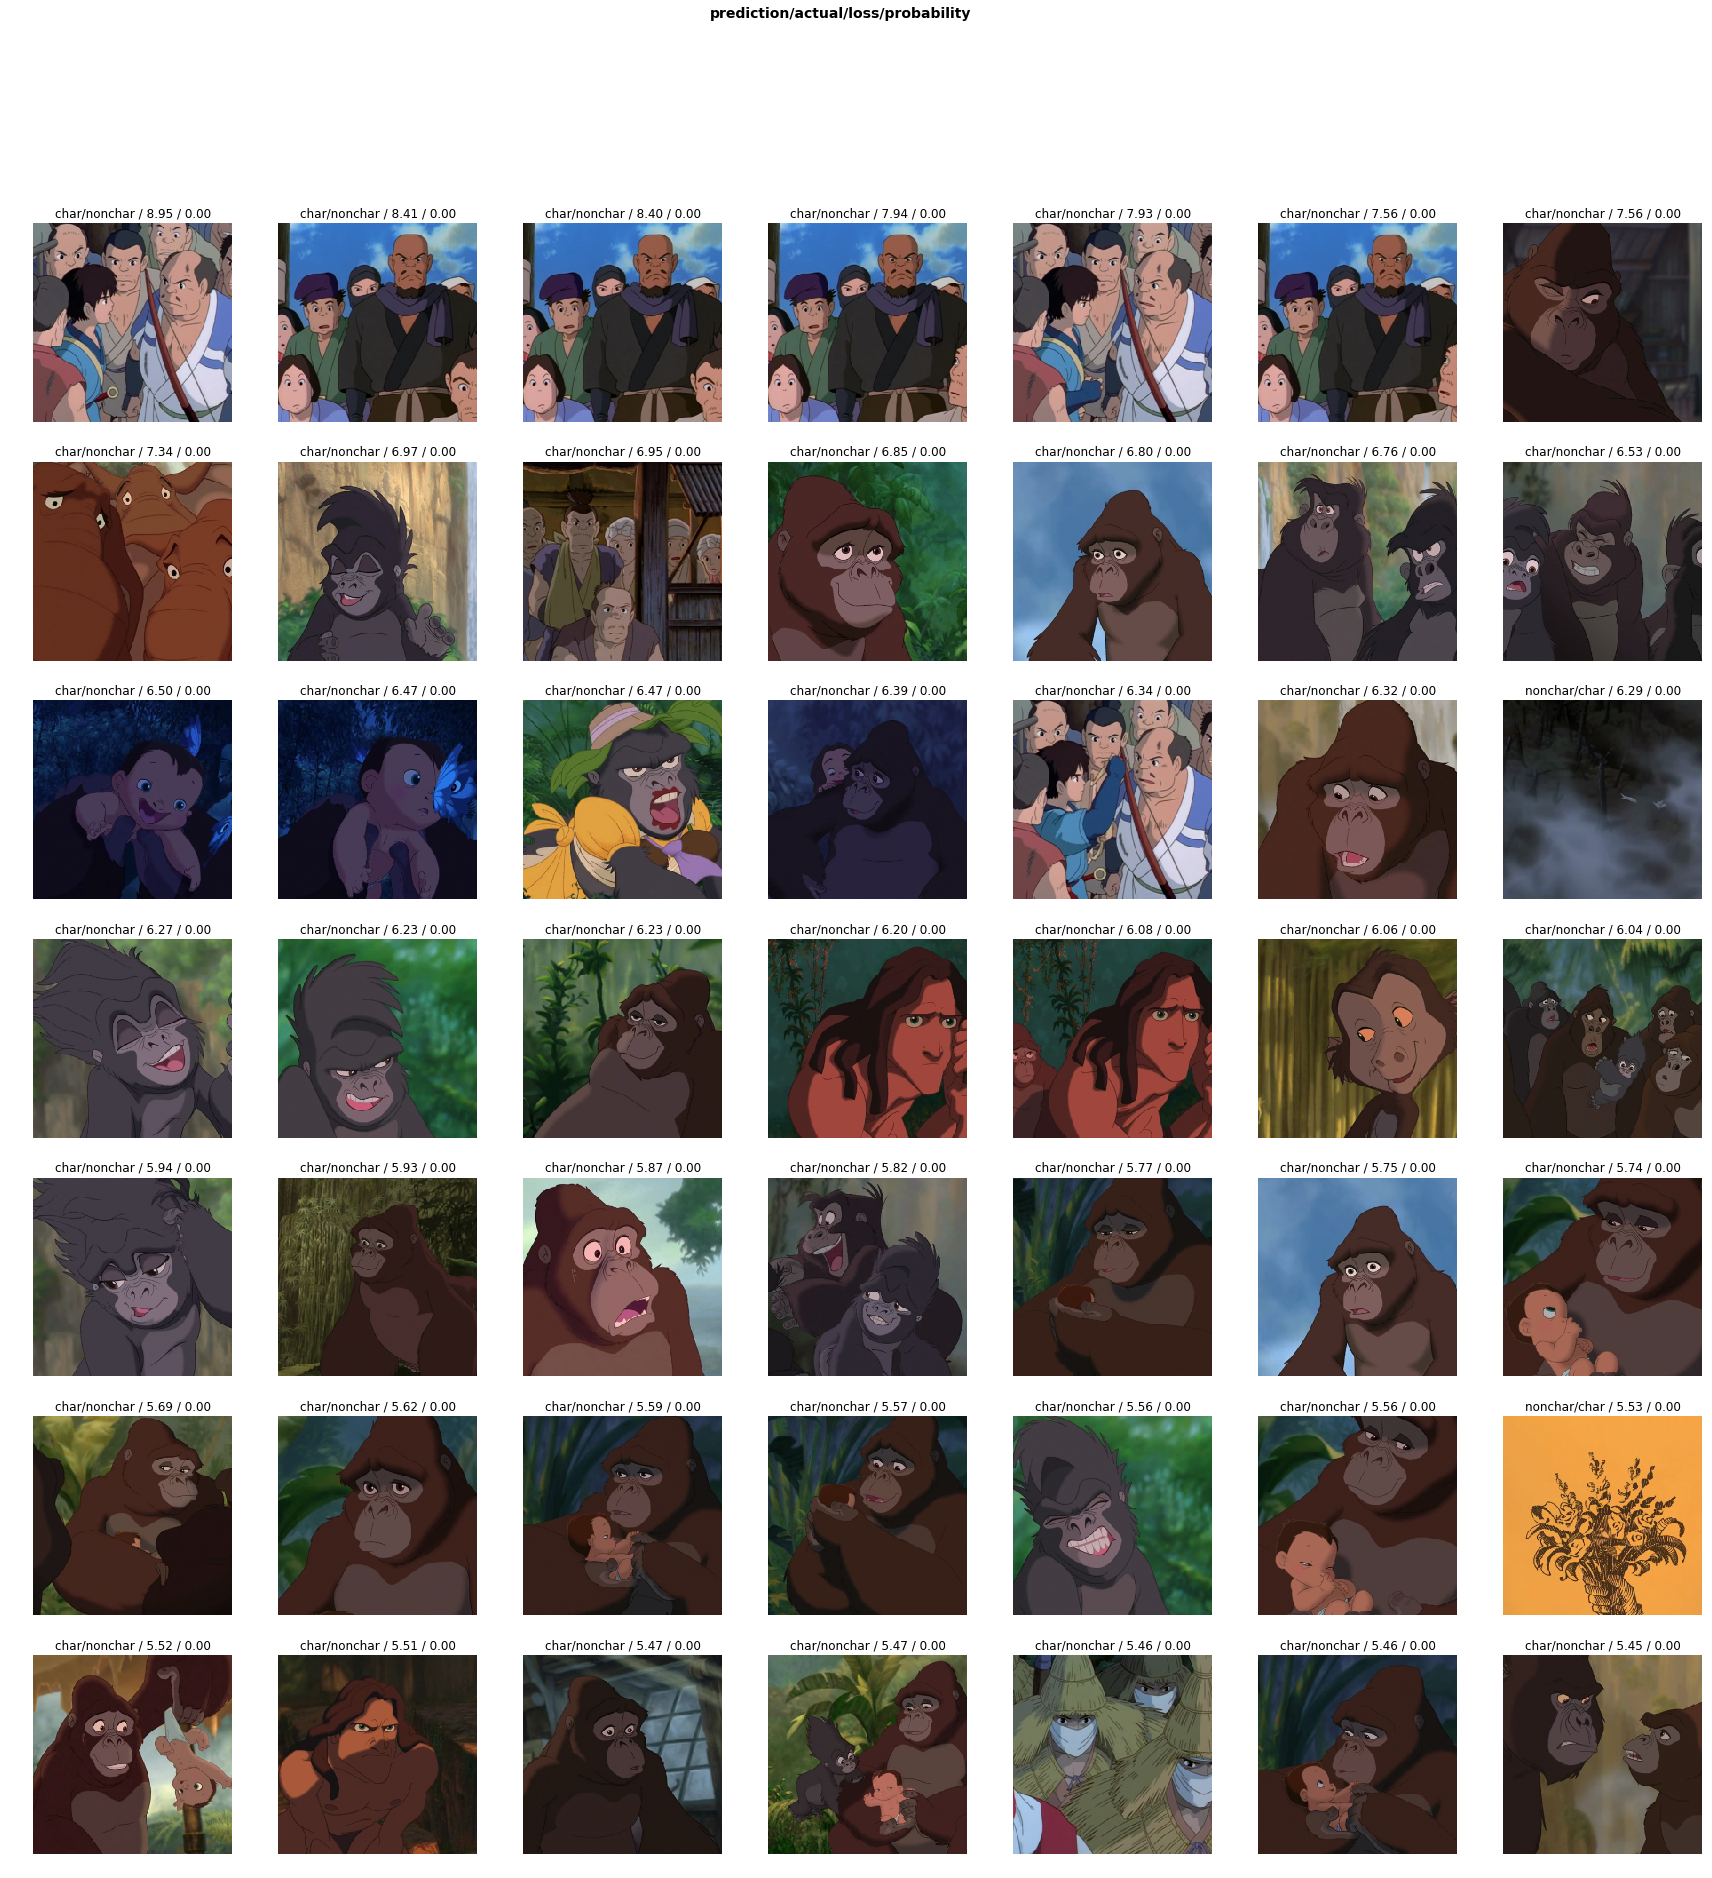

In [25]:
interp.plot_top_losses(49, figsize=(30,30))